# OCT - RANDOM - CUSTOM 

## Installing and Importing Libraries

In [1]:
import os
from glob import glob
import pandas as pd
import numpy as np
from numpy import expand_dims
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sn
from skimage.transform import resize
from skimage.color import gray2rgb
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import SVG

import tensorflow as tf
from pathlib import Path

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=3500)])
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
        print(e)

import keract
from tensorflow import keras
from tensorflow.keras import applications, optimizers
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.layers import *
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.utils import to_categorical, model_to_dot, plot_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau

from sklearn.utils import class_weight 

1 Physical GPUs, 1 Logical GPUs


## Importing Dataset and Data Pre-Processing

In [2]:
data_dir = "/home/maia/Documents/Universidade/Universidade/UNIVERSIDADE/EXPERIMENTO/0DATASETS/OCT/OCT_RANDOM/"
train_data_dir= '/home/maia/Documents/Universidade/Universidade/UNIVERSIDADE/EXPERIMENTO/0DATASETS/OCT/OCT_RANDOM/train/'
test_data_dir= '/home/maia/Documents/Universidade/Universidade/UNIVERSIDADE/EXPERIMENTO/0DATASETS/OCT/OCT_RANDOM/test/'
img_width, img_height = 150, 150 
channels = 3
batch_size = 32
# image_arr_size= img_width * img_height * channels

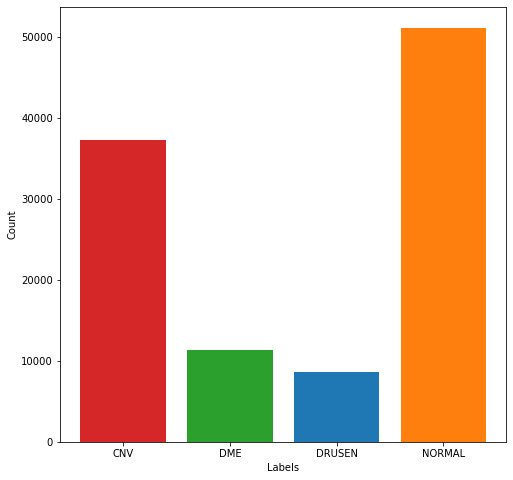

In [3]:
cnv_images = len(glob(train_data_dir + 'CNV/*.jpeg'))
dme_images = len(glob(train_data_dir + 'DME/*.jpeg'))
drusen_images = len(glob(train_data_dir + 'DRUSEM/*.jpeg'))
normal_images = len(glob(train_data_dir + 'NORMAL/*.jpeg'))
data= {'CNV': cnv_images, 'DME': dme_images, 'DRUSEN': drusen_images, 'NORMAL': normal_images}
labels = list(data.keys()) 
count = list(data.values()) 

plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.bar(labels, count, color=['tab:red', 'tab:green', 'tab:blue', 'tab:orange'])
plt.axis('on')
plt.xlabel("Labels") 
plt.ylabel("Count") 
plt.savefig('labels_vs_counts.png', transparent= False, bbox_inches= 'tight', dpi= 400)
plt.show() 

### Sample Images from the Dataset

Normal


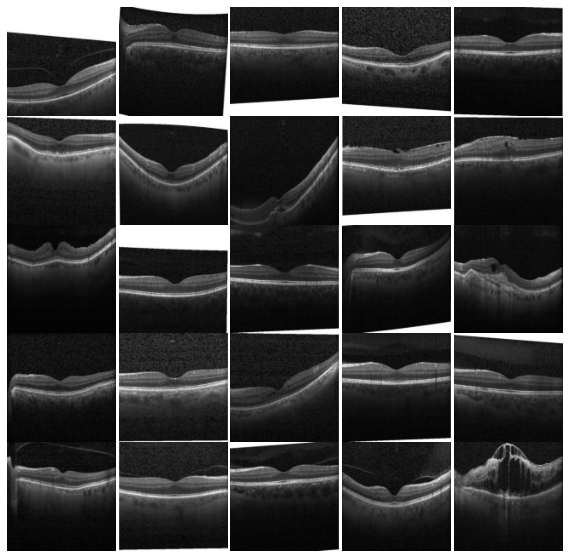

In [4]:
print("Normal")
multipleImages = glob(data_dir + 'train/NORMAL/**')
i = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for im in multipleImages[:25]:
    image = mpimg.imread(im)
    image_resized = resize(image, (128, 128)) 
    plt.subplot(5, 5, i+1) #.set_title(l)
    plt.imshow(gray2rgb(image_resized)); plt.axis('off')
    i += 1
plt.savefig('normal_eye.png', transparent= False, bbox_inches= 'tight', dpi= 400)

Choroidal Neo-Vascularization (CNV)


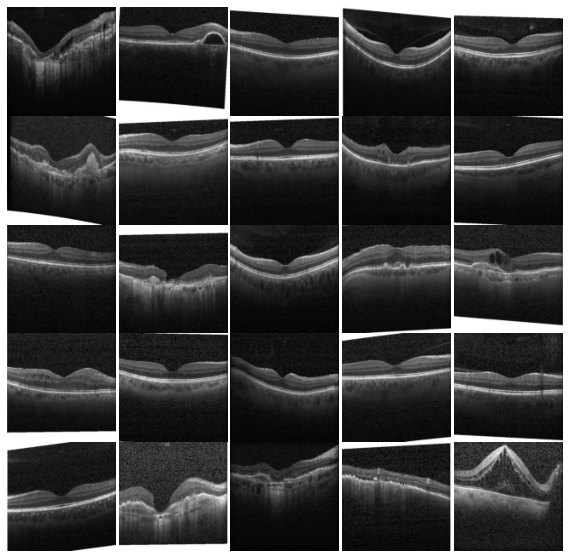

In [5]:
print("Choroidal Neo-Vascularization (CNV)")
multipleImages = glob(data_dir + 'train/CNV/**')
i = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for im in multipleImages[:25]:
    image = mpimg.imread(im)
    image_resized = resize(image, (128, 128)) 
    plt.subplot(5, 5, i+1) #.set_title(l)
    plt.imshow(gray2rgb(image_resized)); plt.axis('off')
    i += 1
plt.savefig('cnv_eye.png', transparent= False, bbox_inches= 'tight', dpi= 400)

Diabetic Macular Edema (DME)


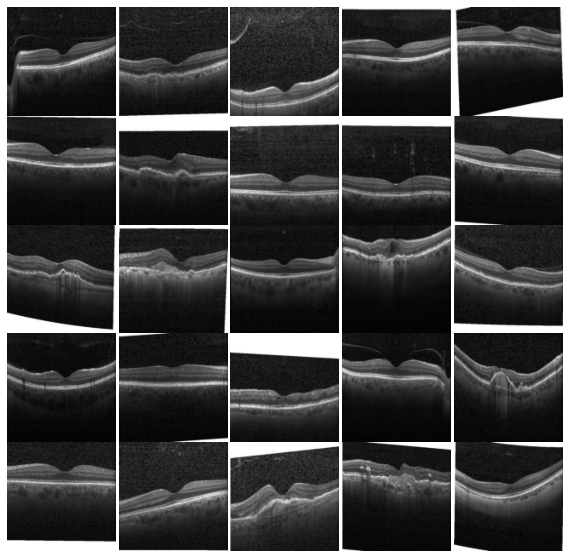

In [6]:
print("Diabetic Macular Edema (DME)") 
multipleImages = glob(data_dir + 'train/DME/**')
i = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for im in multipleImages[:25]:
    image = mpimg.imread(im)
    image_resized = resize(image, (128, 128)) 
    plt.subplot(5, 5, i+1) #.set_title(l)
    plt.imshow(gray2rgb(image_resized)); plt.axis('off')
    i += 1
plt.savefig('dme_eye.png', transparent= False, bbox_inches= 'tight', dpi= 400)

In [7]:
print("Drusen")
multipleImages = glob(data_dir + 'train/DRUSEN/**')
i = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for im in multipleImages[:25]:
    image = mpimg.imread(im)
    image_resized = resize(image, (128, 128)) 
    plt.subplot(5, 5, i+1) #.set_title(l)
    plt.imshow(gray2rgb(image_resized)); plt.axis('off')
    i += 1
plt.savefig('drusen_eye.png', transparent= False, bbox_inches= 'tight', dpi= 400)

Drusen


<Figure size 720x720 with 0 Axes>

### Keras Data Generators

In [8]:
train_datagen = ImageDataGenerator(
)

valid_test_datagen = ImageDataGenerator(
)

In [9]:
batch_size = 32

train_generator = train_datagen.flow_from_directory(  
    train_data_dir,  
    target_size= (img_width, img_height), 
    color_mode= 'rgb',
    batch_size= batch_size,  
    class_mode= 'categorical',
    shuffle= True, 
    seed= 1337
) 

test_generator = valid_test_datagen.flow_from_directory(  
    test_data_dir,  
    target_size= (img_width, img_height), 
    color_mode= 'rgb',
    batch_size= batch_size,        
    class_mode= 'categorical',
    shuffle= False, 
)

Found 108309 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.


In [10]:
num_classes = len(train_generator.class_indices)  
train_labels = train_generator.classes 
train_labels = to_categorical(train_labels, num_classes=num_classes)

nb_train_samples = len(train_generator.filenames)  
nb_test_samples = len(test_generator.filenames)

# Model
* VGG16 CNN architecture is used for calssification.
* Pretrained on the 'ImageNet' dataset.

In [11]:
model = Sequential()
model.add(Conv2D(filters= 32 , kernel_size=(5,5), padding = 'same', activation = 'relu' , input_shape = (img_width, img_height,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(5,5), padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(5,5), padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 32)        51232     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10368)             0

### VGG16 Architecture

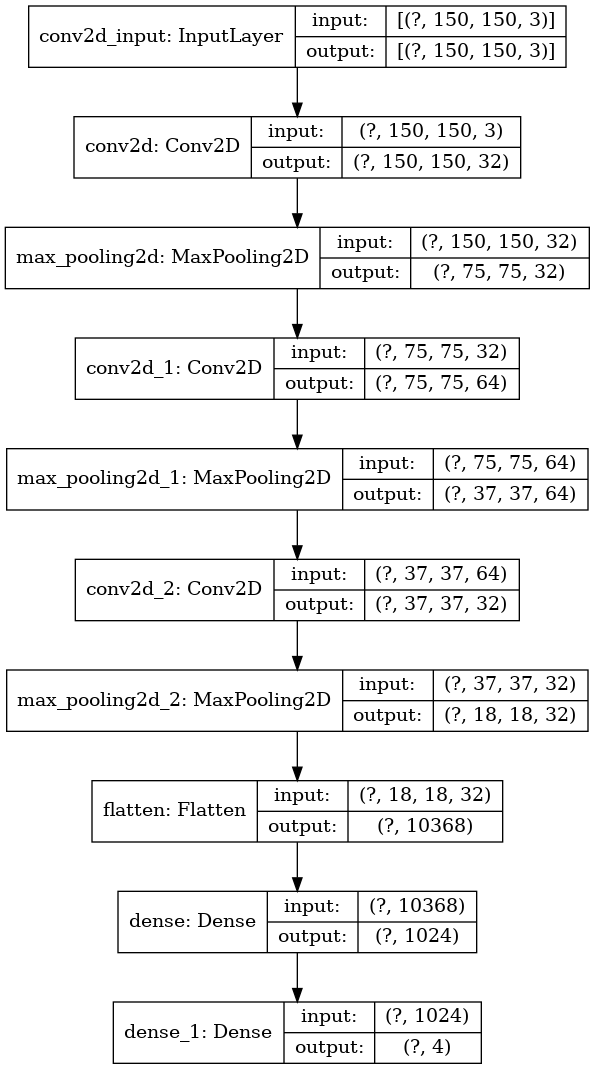

In [12]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, expand_nested=True)

## Baseline Model Training

In [13]:
model.compile(optimizer= keras.optimizers.Adagrad(), loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [14]:
checkpoint = ModelCheckpoint(
    'basetuned_model.h5',
    monitor='loss',
    verbose=1,
    save_best_only=True,
    mode='auto',
    save_weights_only=False,
    period=1
)

earlystop = EarlyStopping(
    monitor='loss',
    min_delta=0.001,
    patience=10,
    verbose=1,
    mode='auto',
    restore_best_weights=True
)


csvlogger = CSVLogger(
    filename= "baseline_training_csv.log",
    separator = ",",
    append = False
)

reduceLR = ReduceLROnPlateau(
    monitor='loss',
    factor=0.75,
    patience=3,
    verbose=1, 
    mode='auto'
)

class_weights = class_weight.compute_class_weight(
       'balanced',
        np.unique(train_generator.classes), 
        train_generator.classes)
class_weights = dict(enumerate(class_weights))

callbacks = [checkpoint, csvlogger,reduceLR]

/home/maia/anaconda3/envs/MST_TRAIN/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass classes=[0 1 2 3], y=[0 0 0 ... 3 3 3] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [15]:
history = model.fit(
    train_generator, 
    epochs = 100,
    steps_per_epoch = nb_train_samples//batch_size,
    validation_data = test_generator, 
    validation_steps = nb_test_samples//batch_size,
    verbose = 1,
    callbacks = callbacks,
    shuffle = True,
    class_weight=class_weights
)

Epoch 1/100
3384/3384 [==============================] - ETA: 0s - loss: 1.4912 - accuracy: 0.2059
Epoch 00001: loss improved from inf to 1.49115, saving model to basetuned_model.h5
3384/3384 [==============================] - 294s 87ms/step - loss: 1.4912 - accuracy: 0.2059 - val_loss: 1.3878 - val_accuracy: 0.2399 - lr: 0.0010
Epoch 2/100
3384/3384 [==============================] - ETA: 0s - loss: 1.3853 - accuracy: 0.2435
Epoch 00002: loss improved from 1.49115 to 1.38531, saving model to basetuned_model.h5
3384/3384 [==============================] - 292s 86ms/step - loss: 1.3853 - accuracy: 0.2435 - val_loss: 1.3932 - val_accuracy: 0.2228 - lr: 0.0010
Epoch 3/100
3384/3384 [==============================] - ETA: 0s - loss: 1.3834 - accuracy: 0.1992
Epoch 00003: loss improved from 1.38531 to 1.38339, saving model to basetuned_model.h5
3384/3384 [==============================] - 293s 87ms/step - loss: 1.3834 - accuracy: 0.1992 - val_loss: 1.3944 - val_accuracy: 0.2268 - lr: 0.0010

3384/3384 [==============================] - 285s 84ms/step - loss: 1.2365 - accuracy: 0.3455 - val_loss: 1.5100 - val_accuracy: 0.2560 - lr: 0.0010
Epoch 26/100
3384/3384 [==============================] - ETA: 0s - loss: 1.2253 - accuracy: 0.3560
Epoch 00026: loss improved from 1.23652 to 1.22532, saving model to basetuned_model.h5
3384/3384 [==============================] - 281s 83ms/step - loss: 1.2253 - accuracy: 0.3560 - val_loss: 1.5190 - val_accuracy: 0.2530 - lr: 0.0010
Epoch 27/100
3384/3384 [==============================] - ETA: 0s - loss: 1.2137 - accuracy: 0.3639
Epoch 00027: loss improved from 1.22532 to 1.21375, saving model to basetuned_model.h5
3384/3384 [==============================] - 283s 83ms/step - loss: 1.2137 - accuracy: 0.3639 - val_loss: 1.5216 - val_accuracy: 0.2560 - lr: 0.0010
Epoch 28/100
3384/3384 [==============================] - ETA: 0s - loss: 1.2020 - accuracy: 0.3718
Epoch 00028: loss improved from 1.21375 to 1.20204, saving model to basetuned_m

Epoch 50/100
3384/3384 [==============================] - ETA: 0s - loss: 0.8999 - accuracy: 0.5526
Epoch 00050: loss improved from 0.91469 to 0.89990, saving model to basetuned_model.h5
3384/3384 [==============================] - 281s 83ms/step - loss: 0.8999 - accuracy: 0.5526 - val_loss: 2.0429 - val_accuracy: 0.2470 - lr: 0.0010
Epoch 51/100
3384/3384 [==============================] - ETA: 0s - loss: 0.8855 - accuracy: 0.5595
Epoch 00051: loss improved from 0.89990 to 0.88550, saving model to basetuned_model.h5
3384/3384 [==============================] - 283s 84ms/step - loss: 0.8855 - accuracy: 0.5595 - val_loss: 2.0962 - val_accuracy: 0.2389 - lr: 0.0010
Epoch 52/100
3384/3384 [==============================] - ETA: 0s - loss: 0.8708 - accuracy: 0.5694
Epoch 00052: loss improved from 0.88550 to 0.87076, saving model to basetuned_model.h5
3384/3384 [==============================] - 283s 84ms/step - loss: 0.8708 - accuracy: 0.5694 - val_loss: 2.1350 - val_accuracy: 0.2440 - lr:

3384/3384 [==============================] - 281s 83ms/step - loss: 0.5852 - accuracy: 0.7219 - val_loss: 3.0791 - val_accuracy: 0.2450 - lr: 0.0010
Epoch 75/100
3384/3384 [==============================] - ETA: 0s - loss: 0.5744 - accuracy: 0.7274
Epoch 00075: loss improved from 0.58523 to 0.57444, saving model to basetuned_model.h5
3384/3384 [==============================] - 282s 83ms/step - loss: 0.5744 - accuracy: 0.7274 - val_loss: 3.1692 - val_accuracy: 0.2308 - lr: 0.0010
Epoch 76/100
3384/3384 [==============================] - ETA: 0s - loss: 0.5647 - accuracy: 0.7312
Epoch 00076: loss improved from 0.57444 to 0.56466, saving model to basetuned_model.h5
3384/3384 [==============================] - 281s 83ms/step - loss: 0.5647 - accuracy: 0.7312 - val_loss: 3.1789 - val_accuracy: 0.2399 - lr: 0.0010
Epoch 77/100
3384/3384 [==============================] - ETA: 0s - loss: 0.5529 - accuracy: 0.7387
Epoch 00077: loss improved from 0.56466 to 0.55292, saving model to basetuned_m

Epoch 99/100
3384/3384 [==============================] - ETA: 0s - loss: 0.3774 - accuracy: 0.8278
Epoch 00099: loss improved from 0.38356 to 0.37744, saving model to basetuned_model.h5
3384/3384 [==============================] - 284s 84ms/step - loss: 0.3774 - accuracy: 0.8278 - val_loss: 4.2069 - val_accuracy: 0.2359 - lr: 0.0010
Epoch 100/100
3384/3384 [==============================] - ETA: 0s - loss: 0.3725 - accuracy: 0.8310
Epoch 00100: loss improved from 0.37744 to 0.37249, saving model to basetuned_model.h5
3384/3384 [==============================] - 284s 84ms/step - loss: 0.3725 - accuracy: 0.8310 - val_loss: 4.3493 - val_accuracy: 0.2409 - lr: 0.0010


In [16]:
(eval_loss, eval_accuracy) = model.evaluate(test_generator, batch_size= batch_size, verbose= 1)
print('Test Loss: ', eval_loss)
print('Test Accuracy: ', eval_accuracy)

32/32 [==============================] - 3s 90ms/step - loss: 4.3267 - accuracy: 0.2420
Test Loss:  4.326730251312256
Test Accuracy:  0.24199999868869781


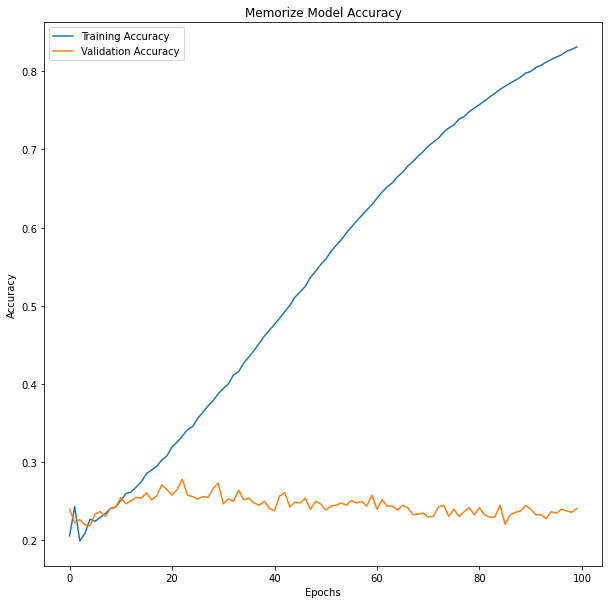

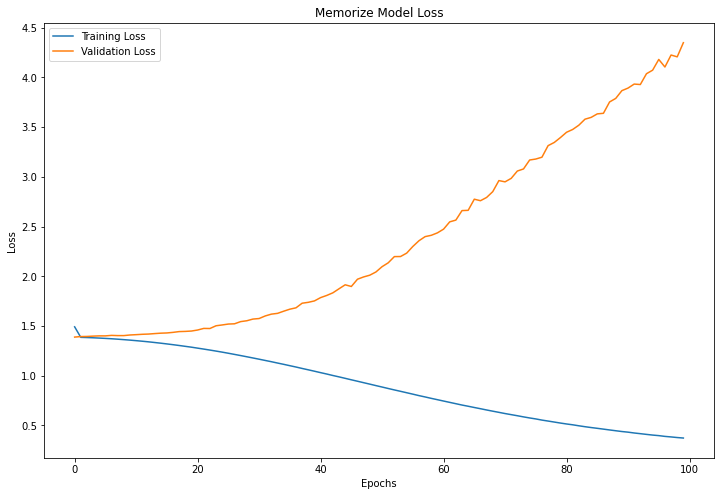

In [17]:
plt.subplot()
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.title('Memorize Model Accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.savefig('baseline_acc_epoch.png', transparent= False, bbox_inches= 'tight', dpi= 400)
plt.show()

plt.subplot()
plt.title('Memorize Model Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Loss','Validation Loss'])
plt.savefig('baseline_loss_epoch.png', transparent= False, bbox_inches= 'tight', dpi= 400)
plt.show()

## Reaching low loss with reduced dataset

In [18]:
model.compile(optimizer= keras.optimizers.Adagrad(), loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [19]:
checkpoint = ModelCheckpoint(
    'finetuned_model.h5',
    monitor='loss',
    verbose=1,
    save_best_only=True,
    mode='auto',
    save_weights_only=False,
    period=1
)


earlystop = EarlyStopping(
    monitor='loss',
    min_delta=0.001,
    patience=10,
    verbose=1,
    mode='auto',
    restore_best_weights=True
)
csvlogger = CSVLogger(
    filename= "reduced_training_csv.log",
    separator = ",",
    append = False
)

reduceLR = ReduceLROnPlateau(
    monitor='loss',
    factor=0.75,
    patience=3,
    verbose=1, 
    mode='auto'
)

callbacks = [checkpoint, earlystop, csvlogger,reduceLR]

In [20]:
batch_size = 200

train_generator = train_datagen.flow_from_directory(  
    train_data_dir,  
    target_size= (img_width, img_height), 
    color_mode= 'rgb',
    batch_size= batch_size,  
    class_mode= 'categorical',
    shuffle= True, 
    seed= 1337
) 

test_generator = valid_test_datagen.flow_from_directory(  
    test_data_dir,  
    target_size= (img_width, img_height), 
    color_mode= 'rgb',
    batch_size= batch_size,        
    class_mode= 'categorical',
    shuffle= False, 
)

Found 108309 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.


In [21]:
X, Y = train_generator.next()

In [22]:
history_1 = model.fit(
    X, Y, 
    epochs = 100,
    batch_size= 16,
    validation_data = test_generator,
    verbose = 1,
    callbacks = callbacks,
    shuffle = True,
    class_weight=class_weights
)

Epoch 1/100
13/13 [==============================] - ETA: 0s - loss: 4.2069 - accuracy: 0.3900
Epoch 00001: loss improved from inf to 4.20688, saving model to finetuned_model.h5
13/13 [==============================] - 5s 348ms/step - loss: 4.2069 - accuracy: 0.3900 - val_loss: 3.5093 - val_accuracy: 0.2250 - lr: 0.0010
Epoch 2/100
13/13 [==============================] - ETA: 0s - loss: 0.8927 - accuracy: 0.6450
Epoch 00002: loss improved from 4.20688 to 0.89273, saving model to finetuned_model.h5
13/13 [==============================] - 4s 321ms/step - loss: 0.8927 - accuracy: 0.6450 - val_loss: 3.5894 - val_accuracy: 0.2180 - lr: 0.0010
Epoch 3/100
13/13 [==============================] - ETA: 0s - loss: 0.5505 - accuracy: 0.7600
Epoch 00003: loss improved from 0.89273 to 0.55051, saving model to finetuned_model.h5
13/13 [==============================] - 4s 311ms/step - loss: 0.5505 - accuracy: 0.7600 - val_loss: 3.9040 - val_accuracy: 0.2450 - lr: 0.0010
Epoch 4/100
13/13 [=======

13/13 [==============================] - ETA: 0s - loss: 0.0030 - accuracy: 1.0000
Epoch 00051: loss improved from 0.00308 to 0.00298, saving model to finetuned_model.h5
13/13 [==============================] - 4s 299ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 8.4979 - val_accuracy: 0.2220 - lr: 0.0010
Epoch 52/100
13/13 [==============================] - ETA: 0s - loss: 0.0029 - accuracy: 1.0000
Epoch 00052: loss improved from 0.00298 to 0.00291, saving model to finetuned_model.h5
13/13 [==============================] - 4s 296ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 8.5227 - val_accuracy: 0.2220 - lr: 0.0010
Epoch 53/100
13/13 [==============================] - ETA: 0s - loss: 0.0028 - accuracy: 1.0000
Epoch 00053: loss improved from 0.00291 to 0.00281, saving model to finetuned_model.h5
13/13 [==============================] - 4s 292ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 8.5384 - val_accuracy: 0.2220 - lr: 0.0010
Epoch 54/100
13/13 [============

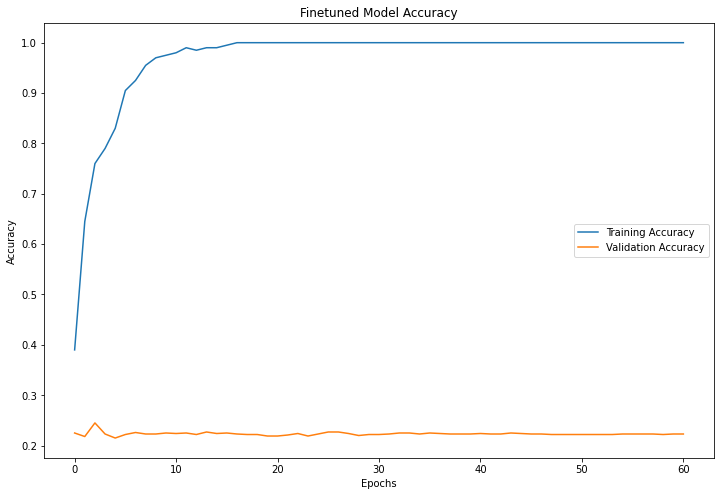

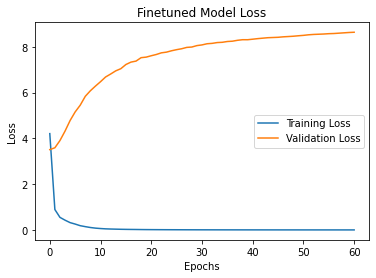

In [23]:
plt.subplot()
plt.rcParams['figure.figsize'] = (6.0, 4.0)
plt.title('Finetuned Model Accuracy')
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.savefig('finetuned_acc_epoch.png', transparent= False, bbox_inches= 'tight', dpi= 400)
plt.show()

plt.subplot()
plt.title('Finetuned Model Loss')
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Loss','Validation Loss'])
plt.savefig('finetuned_loss_epoch.png', transparent= False, bbox_inches= 'tight', dpi= 400)
plt.show()

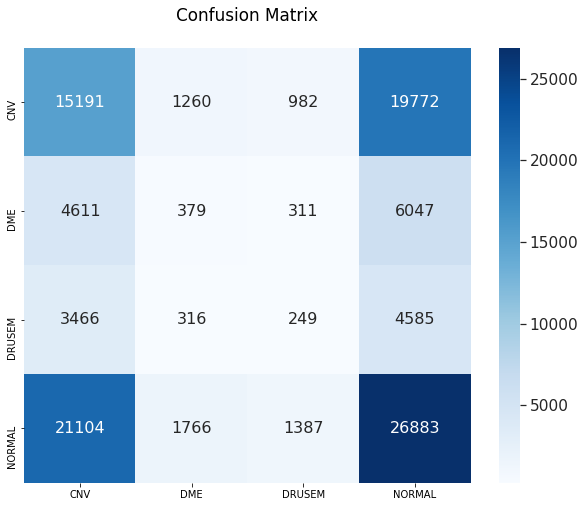

Classification Report

              precision    recall  f1-score   support

         CNV       0.34      0.41      0.37     37205
         DME       0.10      0.03      0.05     11348
      DRUSEM       0.09      0.03      0.04      8616
      NORMAL       0.47      0.53      0.50     51140

    accuracy                           0.39    108309
   macro avg       0.25      0.25      0.24    108309
weighted avg       0.36      0.39      0.37    108309



In [24]:
Y_pred = model.predict(train_generator, nb_train_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(train_generator.classes, y_pred)
df_cm = pd.DataFrame(cm, list(train_generator.class_indices.keys()), list(train_generator.class_indices.keys()))
fig, ax = plt.subplots(figsize=(10,8))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap=plt.cm.Blues, fmt="d")
plt.title('Confusion Matrix\n')
plt.savefig('confusion_matrix_train.png', transparent= False, bbox_inches= 'tight', dpi= 400)

plt.show()

print('Classification Report\n')
target_names = list(train_generator.class_indices.keys())
print(classification_report(train_generator.classes, y_pred, target_names=target_names))

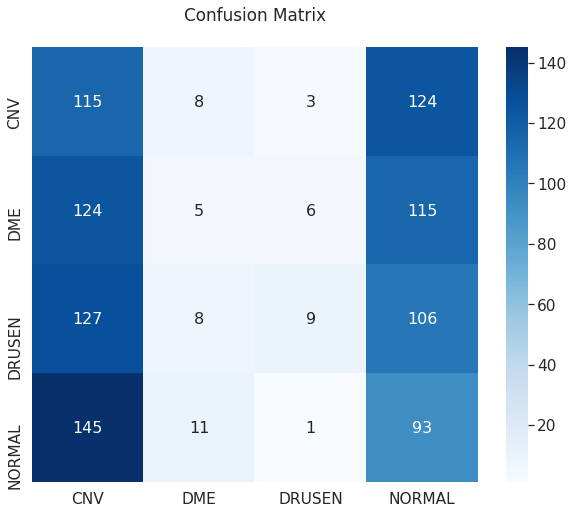

Classification Report

              precision    recall  f1-score   support

         CNV       0.23      0.46      0.30       250
         DME       0.16      0.02      0.04       250
      DRUSEN       0.47      0.04      0.07       250
      NORMAL       0.21      0.37      0.27       250

    accuracy                           0.22      1000
   macro avg       0.27      0.22      0.17      1000
weighted avg       0.27      0.22      0.17      1000



In [25]:
Y_pred = model.predict(test_generator, nb_test_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(test_generator.classes, y_pred)
df_cm = pd.DataFrame(cm, list(test_generator.class_indices.keys()), list(test_generator.class_indices.keys()))
fig, ax = plt.subplots(figsize=(10,8))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap=plt.cm.Blues, fmt="d")
plt.title('Confusion Matrix\n')
plt.savefig('confusion_matrix.png', transparent= False, bbox_inches= 'tight', dpi= 400)
plt.show()

print('Classification Report\n')
target_names = list(test_generator.class_indices.keys())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))